<a href="https://colab.research.google.com/github/vitorkenzoo/Aula-Fiap/blob/main/Damos_lhe_as_boas_vindas_ao_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor


In [36]:
df = pd.read_csv('/household_power_consumption.txt',
                 sep=';',
                 na_values='?')

In [37]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


2.
Global_active_power

Representa a potência ativa consumida pela casa.

É a energia realmente usada para realizar trabalho útil: acender lâmpadas, aquecer, movimentar motores, carregar aparelhos, etc.

Unidade: kilowatt (kW).

É o que aparece na conta de luz que pagamos.



Global_reactive_power

Representa a potência reativa, que não realiza trabalho útil diretamente.

Está associada a campos elétricos e magnéticos de equipamentos indutivos/capacitivos (ex: motores, geladeiras, transformadores).

Ela “vai e volta” entre a fonte e os aparelhos, não é consumida de fato.

Unidade: kilovolt-ampere reativo (kVAR).

Apesar de não aparecer diretamente na conta residencial, em sistemas industriais/comerciais pode gerar cobrança extra (fator de potência baixo).

In [ ]:
# 3 Verificar valores ausentes por coluna
missing_values = df.isnull().sum()

# Exibir resultado
print("Valores ausentes por coluna:")
print(missing_values)

# Total de valores ausentes no dataset
print("\nTotal de valores ausentes:", df.isnull().sum().sum())



Valores ausentes por coluna:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Total de valores ausentes: 181853


In [ ]:
# 4
import pandas as pd

# Converter coluna Date para datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# Criar nova coluna com o dia da semana
df["Weekday"] = df["Date"].dt.day_name(locale="en_US.utf8")

# Mostrar apenas as colunas relevantes
print(df[["Date", "Time", "Weekday"]].head(10))



        Date      Time   Weekday
0 2006-12-16  17:24:00  Saturday
1 2006-12-16  17:25:00  Saturday
2 2006-12-16  17:26:00  Saturday
3 2006-12-16  17:27:00  Saturday
4 2006-12-16  17:28:00  Saturday
5 2006-12-16  17:29:00  Saturday
6 2006-12-16  17:30:00  Saturday
7 2006-12-16  17:31:00  Saturday
8 2006-12-16  17:32:00  Saturday
9 2006-12-16  17:33:00  Saturday


In [ ]:
#5
# Filtrar para o ano de 2007
df_2007 = df[df['Date'].dt.year == 2007].copy()

# Calcular a média diária de Global_active_power para 2007
daily_avg_power_2007 = df_2007.groupby(df_2007['Date'].dt.date)['Global_active_power'].mean()

# Exibir a média diária
print("Média de consumo diário de Global_active_power em 2007:")
print(daily_avg_power_2007)

# Calcular a somatória total do Global_active_power para o ano de 2007
total_power_2007 = df_2007['Global_active_power'].sum()

# Exibir o resultado
print(f"Somatória total do Global_active_power em 2007: {total_power_2007:.2f} kW")


Média de consumo diário de Global_active_power em 2007:
Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
                ...   
2007-12-27    1.758471
2007-12-28    2.161842
2007-12-29    2.290942
2007-12-30    1.777025
2007-12-31    1.539265
Name: Global_active_power, Length: 365, dtype: float64
Somatória total do Global_active_power em 2007: 582708.19 kW


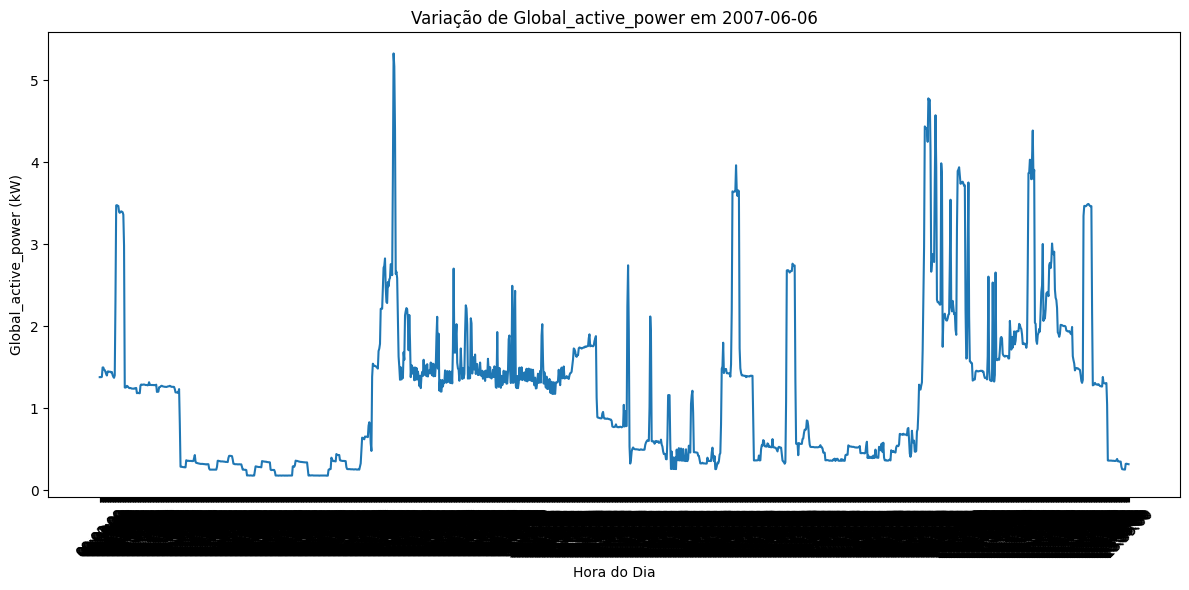

In [ ]:
#6
import matplotlib.pyplot as plt
import seaborn as sns

# Escolha um dia para plotar (formato: 'AAAA-MM-DD')
data_escolhida = '2007-06-06' # Você pode mudar esta data

# Filtrar os dados para o dia escolhido
df_dia_escolhido = df[df['Date'] == data_escolhida].copy()

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_dia_escolhido, x='Time', y='Global_active_power')
plt.title(f'Variação de Global_active_power em {data_escolhida}')
plt.xlabel('Hora do Dia')
plt.ylabel('Global_active_power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

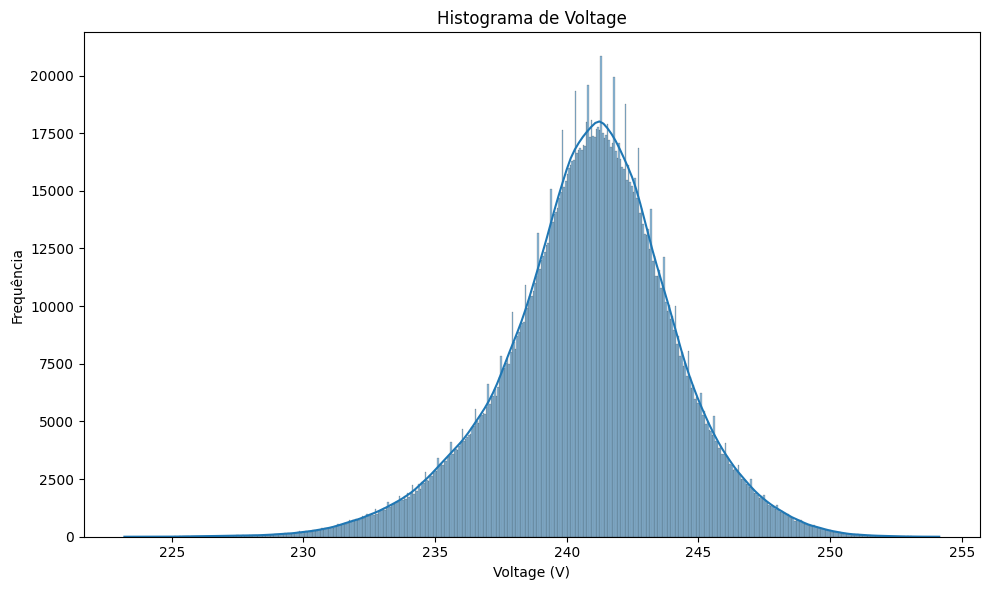

In [ ]:
#7
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o histograma da variável Voltage
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Voltage', kde=True)
plt.title('Histograma de Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

#a maioria das medições está concentrada em torno de 240 Volts,
#com a distribuição parecendo ser simétrica e com um pico principal nessa faixa.
# Isso indica que a tensão na residência é relativamente estável.

In [ ]:
#8
# Criar uma coluna para o mês e ano
df['Month_Year'] = df['Date'].dt.to_period('M')

# Calcular o consumo médio por mês
monthly_avg_power = df.groupby('Month_Year')['Global_active_power'].mean()

# Exibir o resultado
print("Consumo médio mensal de Global_active_power:")
print(monthly_avg_power)

Consumo médio mensal de Global_active_power:
Month_Year
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
2010

In [ ]:
#9
# Calcular a somatória diária de Global_active_power
daily_total_power = df.groupby(df['Date'].dt.date)['Global_active_power'].sum()

# Encontrar o dia com o maior consumo
dia_maior_consumo = daily_total_power.idxmax()
valor_maior_consumo = daily_total_power.max()

# Exibir o resultado
print(f"O dia com o maior consumo de Global_active_power foi {dia_maior_consumo} com um total de {valor_maior_consumo:.2f} kW.")

O dia com o maior consumo de Global_active_power foi 2006-12-23 com um total de 4773.39 kW.


In [ ]:
#10
# Mapear os dias da semana para "Dia de Semana" ou "Fim de Semana"
weekday_map = {
    'Monday': 'Dia de Semana',
    'Tuesday': 'Dia de Semana',
    'Wednesday': 'Dia de Semana',
    'Thursday': 'Dia de Semana',
    'Friday': 'Dia de Semana',
    'Saturday': 'Fim de Semana',
    'Sunday': 'Fim de Semana'
}
df['Day_Type'] = df['Weekday'].map(weekday_map)

# Calcular o consumo médio por tipo de dia (dia de semana vs final de semana)
avg_power_by_day_type = df.groupby('Day_Type')['Global_active_power'].mean()

# Exibir o resultado
print("Consumo médio de Global_active_power por tipo de dia:")
print(avg_power_by_day_type)

Consumo médio de Global_active_power por tipo de dia:
Day_Type
Dia de Semana    1.035472
Fim de Semana    1.234232
Name: Global_active_power, dtype: float64


In [ ]:
#11
# Selecionar as colunas de interesse
colunas_correlacao = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_correlacao = df[colunas_correlacao]

# Calcular a matriz de correlação
matriz_correlacao = df_correlacao.corr()

# Exibir a matriz de correlação
print("Matriz de Correlação:")
print(matriz_correlacao)

Matriz de Correlação:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


In [ ]:
#12
# Criar a nova variável Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head())

   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0


In [ ]:
#13
# Calcular a somatória mensal de Total_Sub_metering
monthly_total_sub_metering = df.groupby('Month_Year')['Total_Sub_metering'].sum()

# Calcular a média mensal de Global_active_power (já calculada anteriormente, mas recalculando para garantir)
monthly_avg_power = df.groupby('Month_Year')['Global_active_power'].mean()

# Comparar a somatória mensal de Total_Sub_metering com a média mensal de Global_active_power
meses_ultrapassaram = monthly_total_sub_metering[monthly_total_sub_metering > monthly_avg_power]

# Exibir os meses em que Total_Sub_metering ultrapassa a média de Global_active_power
if not meses_ultrapassaram.empty:
    print("Meses em que a somatória de Total_Sub_metering ultrapassa a média de Global_active_power:")
    print(meses_ultrapassaram)
else:
    print("Não há meses em que a somatória de Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que a somatória de Total_Sub_metering ultrapassa a média de Global_active_power:
Month_Year
2006-12    239123.0
2007-01    465285.0
2007-02    382462.0
2007-03    455892.0
2007-04    269998.0
2007-05    377317.0
2007-06    318462.0
2007-07    253600.0
2007-08    311404.0
2007-09    354493.0
2007-10    387212.0
2007-11    424179.0
2007-12    519444.0
2008-01    436847.0
2008-02    352756.0
2008-03    422057.0
2008-04    413629.0
2008-05    402611.0
2008-06    422280.0
2008-07    318957.0
2008-08    105802.0
2008-09    381248.0
2008-10    383208.0
2008-11    394569.0
2008-12    391912.0
2009-01    477209.0
2009-02    393948.0
2009-03    441769.0
2009-04    414947.0
2009-05    404717.0
2009-06    321132.0
2009-07    248690.0
2009-08    264304.0
2009-09    394293.0
2009-10    435962.0
2009-11    449447.0
2009-12    495200.0
2010-01    506368.0
2010-02    514572.0
2010-03    420313.0
2010-04    410763.0
2010-05    465108.0
2010-06    420356.0
2010-07    244938.0
2010-08    199671.0

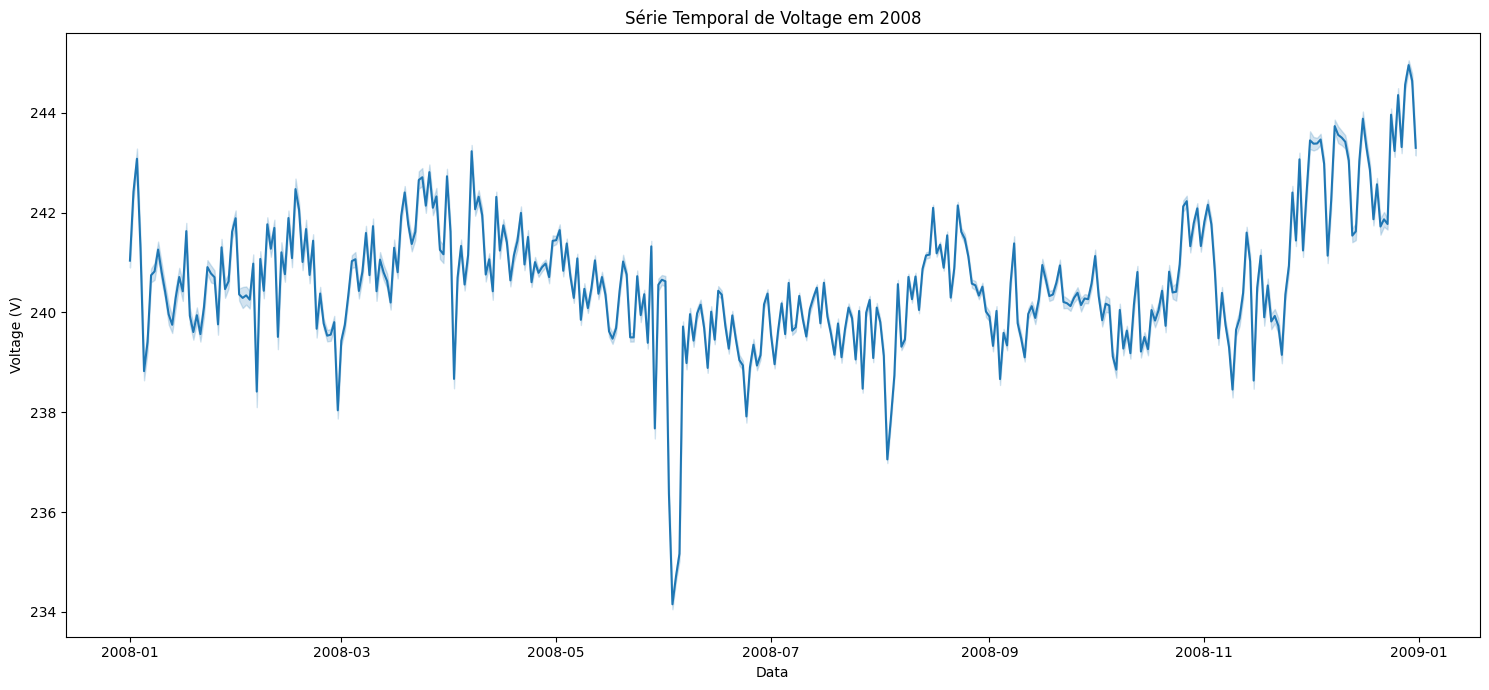

In [ ]:
#14
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para o ano de 2008
df_2008 = df[df['Date'].dt.year == 2008].copy()

# Criar o gráfico de  2008
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_2008, x='Date', y='Voltage')
plt.title('Série Temporal de Voltage em 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()

In [ ]:
#15
# Definir os meses de verão e inverno (hemisfério sul - Brasil)
verao_meses = [12, 1, 2]  # Dezembro, Janeiro, Fevereiro
inverno_meses = [6, 7, 8] # Junho, Julho, Agosto

# Criar colunas para o mês e ano, se ainda não existirem
if 'Month_Year' not in df.columns:
    df['Month_Year'] = df['Date'].dt.to_period('M')

# Extrair o número do mês
df['Month'] = df['Date'].dt.month

# Filtrar os dados para os meses de verão e inverno
df_verao = df[df['Month'].isin(verao_meses)].copy()
df_inverno = df[df['Month'].isin(inverno_meses)].copy()

# Calcular o consumo médio nos meses de verão
media_verao = df_verao['Global_active_power'].mean()

# Calcular o consumo médio nos meses de inverno
media_inverno = df_inverno['Global_active_power'].mean()

# Exibir os resultados
print(f"Consumo médio de Global_active_power nos meses de verão (Brasil): {media_verao:.2f} kW")
print(f"Consumo médio de Global_active_power nos meses de inverno (Brasil): {media_inverno:.2f} kW")

Consumo médio de Global_active_power nos meses de verão (Brasil): 1.42 kW
Consumo médio de Global_active_power nos meses de inverno (Brasil): 0.73 kW


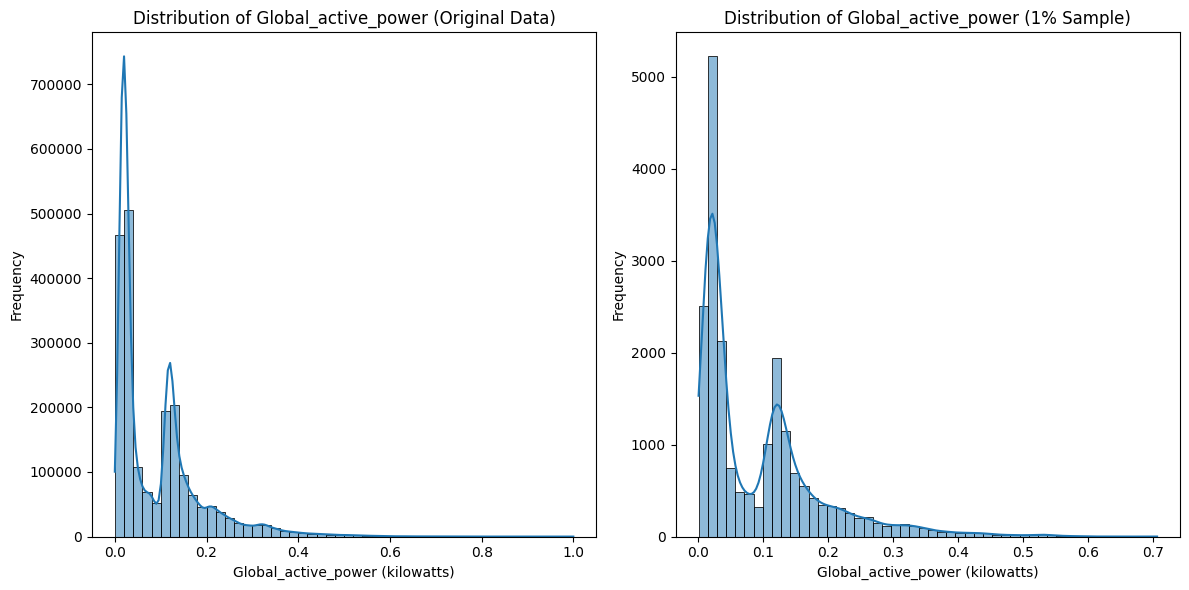

In [41]:
# ex 16
# Create a 1% random sample of the data

df_sample = df.sample(frac=0.01, random_state=42)

# Plot histograms to compare distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (Original Data)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df_sample['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (1% Sample)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
#17
from sklearn.preprocessing import MinMaxScaler

# Identificar as variáveis numéricas principais para normalização
# Excluindo colunas de data/tempo e as sub-medições, que podem ter um tratamento diferente dependendo do objetivo
colunas_numericas_principais = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização
# Fit e transform nas colunas selecionadas
df[colunas_numericas_principais] = scaler.fit_transform(df[colunas_numericas_principais])

# Exibir as primeiras linhas do DataFrame com as colunas normalizadas
print("DataFrame com variáveis numéricas principais normalizadas (Min-Max Scaling):")
print(df[colunas_numericas_principais].head())

DataFrame com variáveis numéricas principais normalizadas (Min-Max Scaling):
   Global_active_power  Global_reactive_power   Voltage  Global_intensity
0             0.374796               0.300719  0.376090          0.377593
1             0.478363               0.313669  0.336995          0.473029
2             0.479631               0.358273  0.326010          0.473029
3             0.480898               0.361151  0.340549          0.473029
4             0.325005               0.379856  0.403231          0.323651


Mean consumption by cluster:


,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
cluster,,,,
0,72.461080,695.950139,1050.105263,4359.013850
1,182.391024,2293.161369,2671.706601,13648.572127
2,130.450775,1651.776786,1769.665179,9046.572917


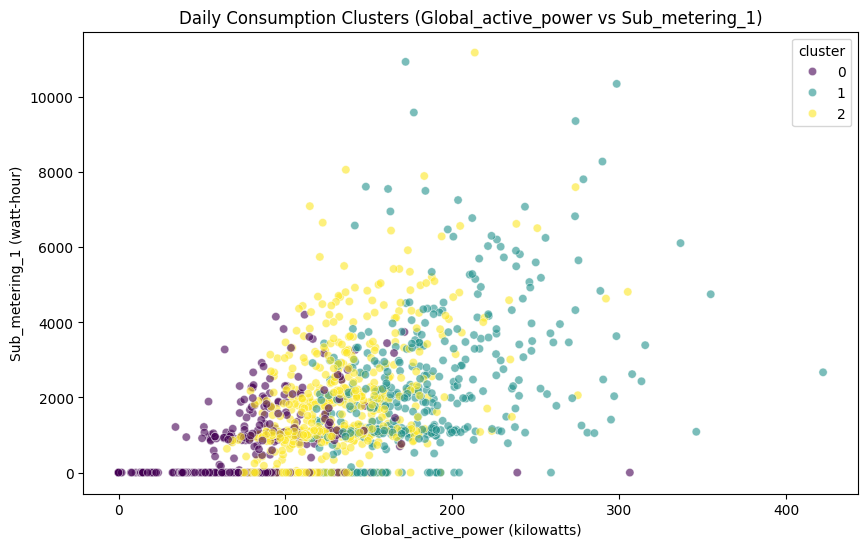

In [46]:
# ex 18
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

daily_consumption = df.groupby('Date')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().dropna()

X = daily_consumption[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init='auto' is also a good option in newer sklearn versions
daily_consumption['cluster'] = kmeans.fit_predict(X)

cluster_interpretation = daily_consumption.groupby('cluster')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

print("Mean consumption by cluster:")
display(cluster_interpretation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Sub_metering_1', hue='cluster', data=daily_consumption, palette='viridis', alpha=0.6)
plt.title('Daily Consumption Clusters (Global_active_power vs Sub_metering_1)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Sub_metering_1 (watt-hour)')
plt.show()

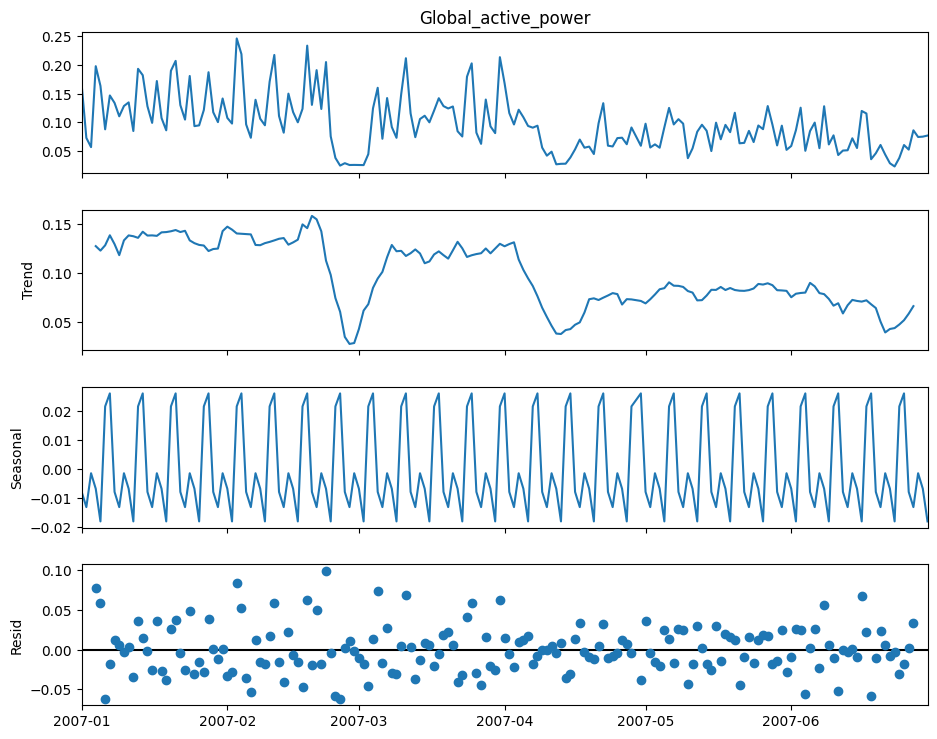

In [48]:
# 19

from statsmodels.tsa.seasonal import seasonal_decompose

# Combinar as colunas 'Date' e 'Time' e converter para datetime com o formato correto
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df = df.set_index('datetime').sort_index()

# Resample para frequência diária e calcular a média, lidando com NaNs
daily_data = df['Global_active_power'].resample('D').mean().dropna()

# Selecionar um período de 6 meses (ex: primeiro semestre de 2007)
start_date = '2007-01-01'
end_date = '2007-06-30'
six_month_period = daily_data[start_date:end_date]

# Realizar a decomposição de série temporal
# Use period=7 para sazonalidade semanal, se a resampling for diária
decomposition = seasonal_decompose(six_month_period, model='additive', period=7)

# Plotar a decomposição
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


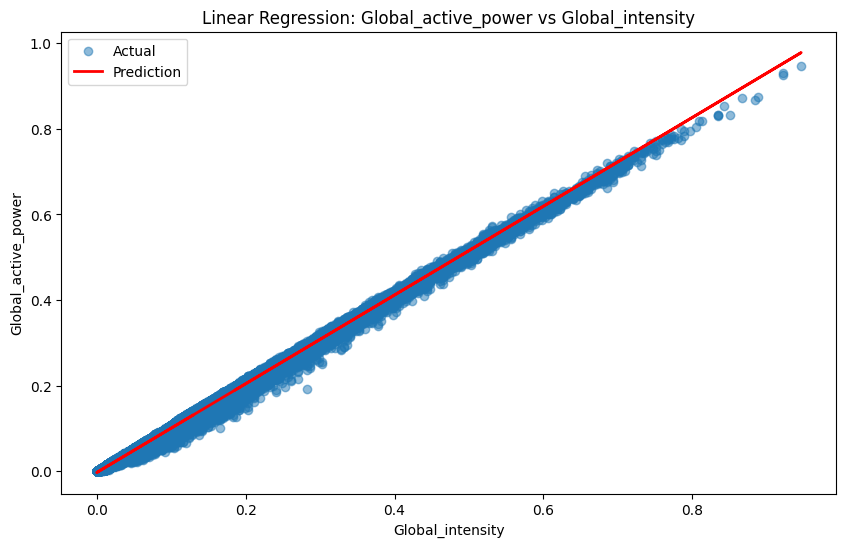

In [49]:
# ex 20
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data - drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Global_intensity']].dropna()

# Define features (X) and target (y)
X = df_regression[['Global_intensity']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Linear Regression: Global_active_power vs Global_intensity')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

/tmp/ipython-input-2663747348.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['Global_active_power'].resample('H').mean().dropna()


Hourly average consumption:
datetime
0     0.052830
1     0.041945
2     0.036630
3     0.033392
4     0.033301
5     0.034191
6     0.064784
7     0.129130
8     0.125379
9     0.113674
10    0.107271
11    0.105958
12    0.102396
13    0.096729
14    0.091142
15    0.082818
16    0.079016
17    0.088735
18    0.113202
19    0.150048
20    0.165044
21    0.162961
22    0.121010
23    0.074791
Name: Global_active_power, dtype: float64

The hour with the highest average consumption is hour 20 with an average of 0.17 kW.


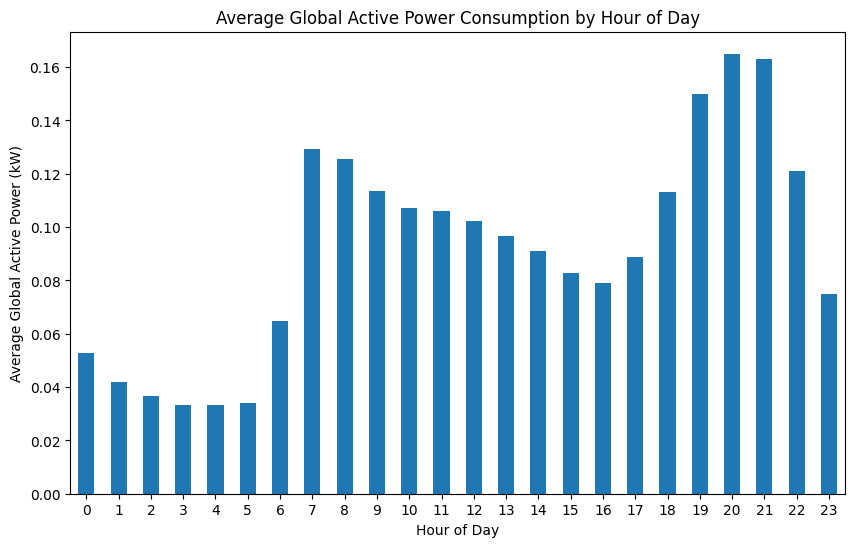

In [52]:
# ex 21
# Ensure Date and Time are treated as strings before combining
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format='%d/%m/%Y %H:%M:%S')
df = df.set_index('datetime').sort_index()

# Resample data to hourly intervals and calculate the mean of Global_active_power
hourly_data = df['Global_active_power'].resample('H').mean().dropna()

# Identify the hours of highest average consumption
# Group by hour of the day and calculate the mean
hourly_mean_consumption = hourly_data.groupby(hourly_data.index.hour).mean()

# Find the hour with the maximum mean consumption
hour_of_highest_consumption = hourly_mean_consumption.idxmax()
max_average_consumption = hourly_mean_consumption.max()

print(f"Hourly average consumption:\n{hourly_mean_consumption}\n")
print(f"The hour with the highest average consumption is hour {hour_of_highest_consumption} with an average of {max_average_consumption:.2f} kW.")

# Optional: Plot the average consumption by hour
plt.figure(figsize=(10, 6))
hourly_mean_consumption.plot(kind='bar')
plt.title('Average Global Active Power Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(rotation=0)
plt.show()

In [53]:
# ex 22
from statsmodels.tsa.stattools import acf
import numpy as np

lags = [1, 24, 48]
autocorr_values = acf(hourly_data, nlags=max(lags), fft=False)

print("Autocorrelation of Global_active_power:")
for lag in lags:
    print(f"Lag {lag} hours: {autocorr_values[lag]:.4f}")

Autocorrelation of Global_active_power:
Lag 1 hours: 0.7132
Lag 24 hours: 0.4346
Lag 48 hours: 0.3981


In [54]:
# ex 23
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the relevant columns for PCA
pca_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[pca_cols].dropna()

# Standardize the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a new DataFrame with the principal components
df_principal_components = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

# Add the Date and Time back to the principal components DataFrame for potential future use
# Aligning by index after dropping NaNs and before scaling is crucial
df_principal_components.index = df_pca.index

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by principal component:")
print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
print(f"Total explained variance: {explained_variance_ratio.sum():.4f}")

# Display the first few rows of the new DataFrame
print("\nFirst 5 rows of the DataFrame with principal components:")
display(df_principal_components.head())

Explained variance ratio by principal component:
Principal Component 1: 0.5910
Principal Component 2: 0.2272
Total explained variance: 0.8182

First 5 rows of the DataFrame with principal components:


,principal_component_1,principal_component_2
datetime,,
2006-12-16 17:24:00,5.191176,1.241976
2006-12-16 17:25:00,6.698092,1.070631
2006-12-16 17:26:00,6.894031,1.544068
2006-12-16 17:27:00,6.857242,1.623923
2006-12-16 17:28:00,4.661351,2.337338


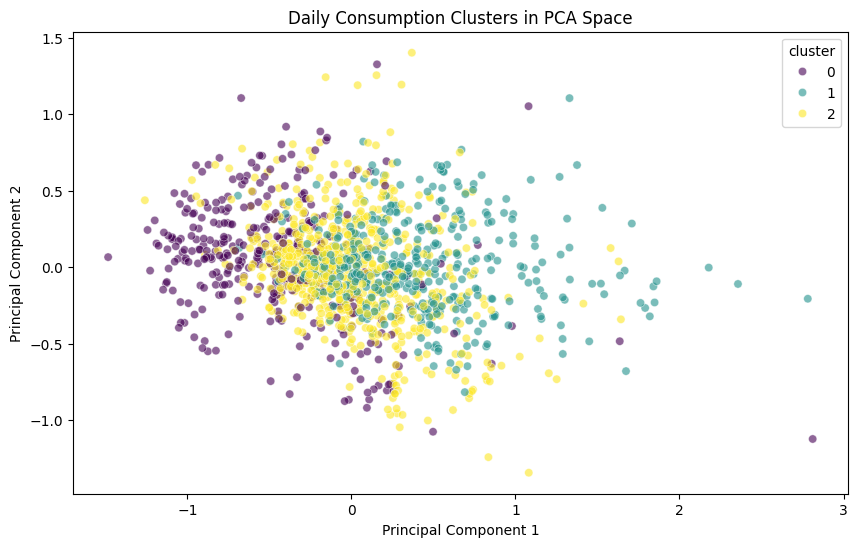

In [60]:
# ex 24
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
daily_consumption = df.groupby(df['Date'].dt.date)[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().dropna()
daily_consumption.index = pd.to_datetime(daily_consumption.index) # Convert index to datetime for joining

X_kmeans = daily_consumption[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_consumption['cluster'] = kmeans.fit_predict(X_kmeans)

# Aggregate df_principal_components by day before joining
df_principal_components_daily = df_principal_components.resample('D').mean()


# Join the daily principal components with the daily consumption clusters
df_pca_clusters = df_principal_components_daily.join(daily_consumption['cluster'])

# Drop any rows where there might be a mismatch after joining (shouldn't happen if indices are aligned)
df_pca_clusters.dropna(inplace=True)


# Plot the clusters in the PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=df_pca_clusters, palette='viridis', alpha=0.6)
plt.title('Daily Consumption Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Simple Linear Regression RMSE: 0.0880
Polynomial Regression (Degree 2) RMSE: 0.0876


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


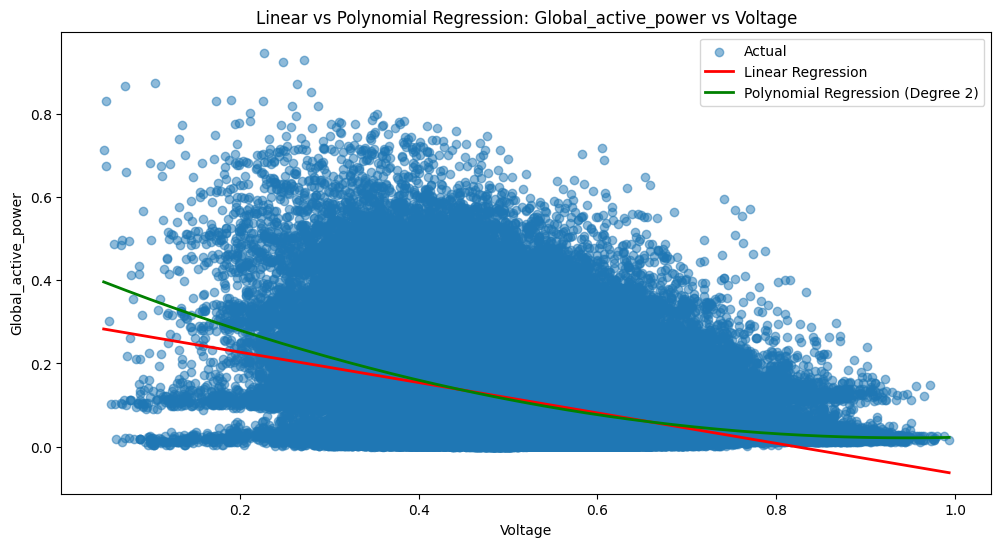

In [63]:
# ex 25

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures # Importando PolynomialFeatures
import matplotlib.pyplot as plt # Importando matplotlib.pyplot

# Prepare the data - drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Voltage']].dropna().copy()

# Define features (X) and target (y)
X = df_regression[['Voltage']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Simple Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Simple Linear Regression RMSE: {rmse_linear:.4f}")

# --- Polynomial Regression (Degree 2) ---
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
y_pred_polynomial = polynomial_model.predict(X_test_poly)
rmse_polynomial = np.sqrt(mean_squared_error(y_test, y_pred_polynomial))

print(f"Polynomial Regression (Degree 2) RMSE: {rmse_polynomial:.4f}")

# --- Visualize the results ---
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')

# Sort the test data for smoother plotting of the regression lines
X_test_sorted = np.sort(X_test, axis=0)
y_pred_linear_sorted = linear_model.predict(X_test_sorted)
X_test_poly_sorted = poly_features.transform(X_test_sorted)
y_pred_polynomial_sorted = polynomial_model.predict(X_test_poly_sorted)


plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test_sorted, y_pred_polynomial_sorted, color='green', linewidth=2, label='Polynomial Regression (Degree 2)')

plt.title('Linear vs Polynomial Regression: Global_active_power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

In [67]:
df = pd.read_csv("/energydata_complete.csv")

In [68]:
# ex 26 --- PARTE 3

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


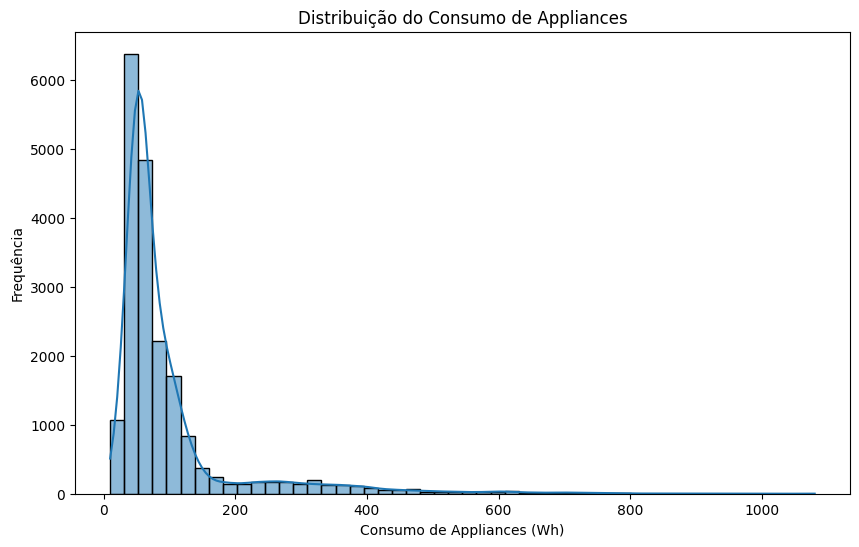

In [71]:
# ex 27
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Appliances', bins=50, kde=True)
plt.title('Distribuição do Consumo de Appliances')
plt.xlabel('Consumo de Appliances (Wh)')
plt.ylabel('Frequência')
plt.show()

- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

O histograma da variável Appliances (célula acima) mostra que a distribuição do consumo tende a se concentrar em valores baixos. Há um pico de frequência muito alto para valores próximos a zero, indicando que a maioria das medições de consumo de Appliances registra valores baixos. A frequência diminui significativamente à medida que os valores de consumo aumentam, com poucos registros de consumo muito alto.

In [72]:
# 28. Correlações com variáveis ambientais
# Selecionar as colunas relevantes: Appliances e variáveis de temperatura e umidade
# As variáveis de temperatura e umidade parecem ser T1, RH_1, T2, RH_2, etc., T_out, RH_out, Tdewpoint
colunas_correlacao_ambiental = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Tdewpoint']

# Calcular a matriz de correlação
matriz_correlacao_ambiental = df[colunas_correlacao_ambiental].corr()

# Exibir as correlações com 'Appliances' e ordenar para facilitar a visualização
correlacoes_appliances = matriz_correlacao_ambiental['Appliances'].sort_values(ascending=False)

print("Correlações de Appliances com variáveis ambientais:")
print(correlacoes_appliances)

# Pergunta: quais fatores têm mais relação com o consumo?
# Os fatores com maior valor absoluto de correlação (mais próximo de 1 ou -1) têm mais relação.

Correlações de Appliances com variáveis ambientais:
Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
Tdewpoint     0.015353
T9            0.010010
RH_5          0.006955
RH_9         -0.051462
RH_7         -0.055642
RH_2         -0.060465
RH_6         -0.083178
RH_8         -0.094039
RH_out       -0.152282
Name: Appliances, dtype: float64


In [74]:
# 29. Normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Identificar as variáveis numéricas para normalização
# Excluímos colunas que não são numéricas ou que não devem ser escaladas (como 'date', 'lights')
# Vamos incluir todas as colunas numéricas exceto 'Appliances' e 'lights' por enquanto, que são os alvos
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
colunas_para_normalizar = [col for col in colunas_numericas if col not in ['Appliances', 'lights']]


# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização
# Fit e transform nas colunas selecionadas
df[colunas_para_normalizar] = scaler.fit_transform(df[colunas_para_normalizar])

# Exibir as primeiras linhas do DataFrame com as colunas normalizadas para verificar
print("DataFrame com variáveis numéricas normalizadas (Min-Max Scaling):")
print(df[colunas_para_normalizar].head())

# Os dados normalizados estão agora no DataFrame 'df' e podem ser reutilizados em modelos posteriores.

DataFrame com variáveis numéricas normalizadas (Min-Max Scaling):
        T1      RH_1        T2      RH_2        T3      RH_3        T4  \
0  0.32735  0.566187  0.225345  0.684038  0.215188  0.746066  0.351351   
1  0.32735  0.541326  0.225345  0.682140  0.215188  0.748871  0.351351   
2  0.32735  0.530502  0.225345  0.679445  0.215188  0.755569  0.344745   
3  0.32735  0.524080  0.225345  0.678414  0.215188  0.758685  0.341441   
4  0.32735  0.531419  0.225345  0.676727  0.215188  0.758685  0.341441   

       RH_4        T5      RH_5  ...        T9      RH_9     T_out  \
0  0.764262  0.175506  0.381691  ...  0.223032  0.677290  0.372990   
1  0.782437  0.175506  0.381691  ...  0.226500  0.678532  0.369239   
2  0.778062  0.175506  0.380037  ...  0.219563  0.676049  0.365488   
3  0.770949  0.175506  0.380037  ...  0.219563  0.671909  0.361736   
4  0.762697  0.178691  0.380037  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1

Variância explicada por componente principal:
Componente Principal 1: 0.3583
Componente Principal 2: 0.2713
Variância total explicada pelos 2 componentes: 0.6296


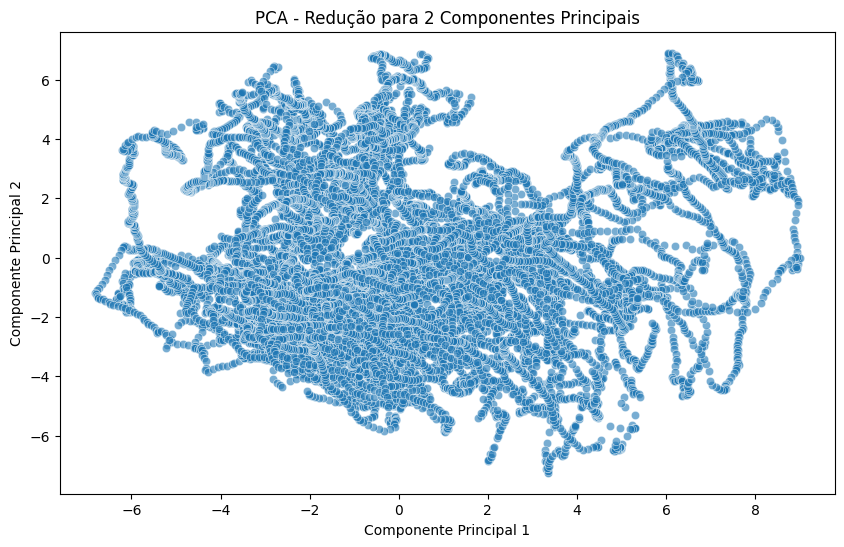

In [75]:
# ex 30
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Identificar as variáveis numéricas para PCA (excluindo 'Appliances' e 'lights')
# Reutilizando a lista de colunas numéricas do passo de normalização, excluindo os alvos
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
colunas_para_pca = [col for col in colunas_numericas if col not in ['Appliances', 'lights']]


# Selecionar os dados para PCA
df_pca = df[colunas_para_pca].copy()

# Padronizar os dados antes de aplicar PCA
# É uma boa prática padronizar os dados antes de PCA, mesmo após a normalização Min-Max,
# pois PCA é sensível à escala das variáveis.
scaler_pca = StandardScaler()
df_scaled_pca = scaler_pca.fit_transform(df_pca)

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_pca)

# Criar um novo DataFrame com os componentes principais
df_principal_components = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

# Opcional: Adicionar a coluna 'Appliances' de volta para visualização ou análise posterior
# df_principal_components['Appliances'] = df['Appliances']


# Analisar a variância explicada pelos componentes
explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por componente principal:")
print(f"Componente Principal 1: {explained_variance_ratio[0]:.4f}")
print(f"Componente Principal 2: {explained_variance_ratio[1]:.4f}")
print(f"Variância total explicada pelos 2 componentes: {explained_variance_ratio.sum():.4f}")


# Plotar os dados resultantes no espaço dos componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=df_principal_components, alpha=0.6)
plt.title('PCA - Redução para 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [76]:
# ex 31

X = df.drop(['date', 'Appliances', 'lights'], axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")

RMSE (Root Mean Squared Error): 92.45
R² (Coefficient of Determination): 0.15


In [78]:
# 32. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Reutilizar os conjuntos de treino e teste criados na célula de Regressão Linear (Ex. 31)
# X_train, X_test, y_train, y_test já estão definidos.

# Instanciar e treinar o modelo Random Forest Regressor
# Use um número razoável de estimadores (n_estimators) e um random_state para reprodutibilidade
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Calcular o RMSE para o modelo Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE (Random Forest Regressor): {rmse_rf:.2f}")

# Comparar com o RMSE do modelo de Regressão Linear (calculado na célula xLbbm6WAhVY2)
# O RMSE da Regressão Linear é armazenado na variável 'rmse' ou 'rmse_lr' dependendo da execução anterior
# Vou assumir que 'rmse_lr' é a variável mais recente ou recalculá-la se necessário.
# Se a variável 'rmse' da célula xLbbm6WAhVY2 estiver disponível:
try:
    print(f"RMSE (Regressão Linear): {rmse_lr:.2f}")
    if rmse_rf < rmse_lr:
        print("O modelo Random Forest teve um desempenho melhor (menor RMSE) que a Regressão Linear.")
    elif rmse_rf > rmse_lr:
        print("O modelo Regressão Linear teve um desempenho melhor (menor RMSE) que o Random Forest.")
    else:
        print("Os modelos Random Forest e Regressão Linear tiveram desempenho similar (RMSE).")
except NameError:
    print("A variável 'rmse_lr' da Regressão Linear não foi encontrada. Por favor, execute a célula de Regressão Linear (xLbbm6WAhVY2) primeiro para comparar.")

RMSE (Random Forest Regressor): 63.99
RMSE (Regressão Linear): 92.45
O modelo Random Forest teve um desempenho melhor (menor RMSE) que a Regressão Linear.


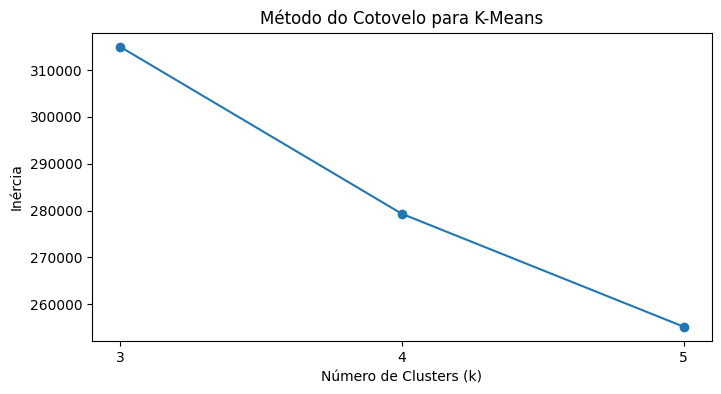


Análise de clusters para k=3:
                  T1       RH_1         T2       RH_2         T3       RH_3  \
cluster_3                                                                     
0          21.026199  37.763553  19.075241  39.103611  21.429605  37.336814   
1          23.418270  41.559645  22.693036  40.500366  24.573040  39.056934   
2          20.865061  43.702119  19.974505  42.992497  21.090421  43.340834   

                  T4       RH_4         T5       RH_5  ...         T9  \
cluster_3                                              ...              
0          20.174485  36.128557  18.854013  49.191885  ...  18.859352   
1          23.168944  39.627240  21.693454  49.904654  ...  21.880456   
2          19.349058  44.158456  18.466915  55.818977  ...  17.768102   

                RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
cluster_3                                                            
0          39.039590   4.092176   757.050571  81.455102   3.281653 

In [81]:
# ex 33
df = pd.read_csv("/energydata_complete.csv")

X_clustering = df.drop(['date', 'Appliances', 'lights'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

inertia = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_) # Adicionar a inércia à lista
    df[f'cluster_{k}'] = kmeans.labels_
plt.figure(figsize=(8, 4))
plt.plot(range(3, 6), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para K-Means')
plt.xticks(range(3, 6))
plt.show()

print("\nAnálise de clusters para k=3:")
print(df.groupby('cluster_3')[X_clustering.columns].mean())

print("\nAnálise de clusters para k=4:")
print(df.groupby('cluster_4')[X_clustering.columns].mean())

print("\nAnálise de clusters para k=5:")
print(df.groupby('cluster_5')[X_clustering.columns].mean())